In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress

import PythonGraphMod

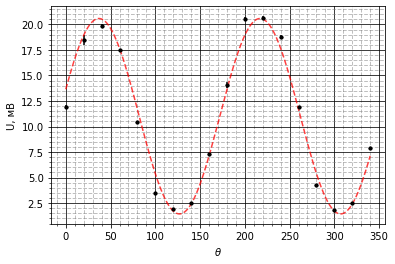

In [32]:
def y(x):
    return 9.57 * np.cos(((x - 37) / 90) * np.pi) + 11.01

# Полцчаем файловый дескриптор файла с данными
df = pd.read_excel("../data/polarisation.ods")

theta = np.array(df['theta'])
U = np.array(df['U'])
U_err = np.array(df['U_err'])

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

# проводим аппроксимацию
# theta_dence, U_dence = PythonGraphMod.InterpolateSet(theta, U, 'cubic', 0, 340)
theta_dence = np.linspace(0, 340, 1000)

# наносим кресты ошибок
plt.errorbar(theta, U, yerr=U_err, fmt='.', ecolor='black', color='black')
# наносим точки эксперементальных данных
ax1.scatter(theta, U, color='black', s=8, marker='o', alpha=1)
# строим аппроксимирующую кривую
# ax1.plot(theta_dence, U_dence, color='red', alpha=0.75, lw=1.5, ls='--', label='lense')
ax1.plot(theta_dence, y(theta_dence), color='red', alpha=0.75, lw=1.5, ls='--', label='lense')

# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel('U, мВ')
plt.xlabel(r'$\theta$')

fig1.savefig("../images/polarisation.pdf")

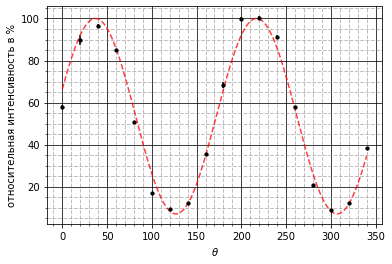

In [33]:
fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

# запишем относительную интенсивность в %
U = np.array(df['U'])
U_err = np.array(df['U_err'])
U = (U / 20.58) * 100
# переведем в относительное процентное представление погрешности
U_err = (U_err / 20.6) * 100

# наносим кресты ошибок
plt.errorbar(theta, U, yerr=U_err, fmt='.', ecolor='black', color='black')
# наносим точки эксперементальных данных
ax2.scatter(theta, U, color='black', s=8, marker='o', alpha=1)
# строим аппроксимирующую кривую
# ax1.plot(theta_dence, U_dence, color='red', alpha=0.75, lw=1.5, ls='--', label='lense')
ax2.plot(theta_dence, (y(theta_dence) / 20.58) * 100, color='red', alpha=0.75, lw=1.5, ls='--', label='lense')

# сетка
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel('относительная интенсивность в %')
plt.xlabel(r'$\theta$')

fig2.savefig("../images/polarisation.pdf")